In [1]:
# Imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_for_R.csv")

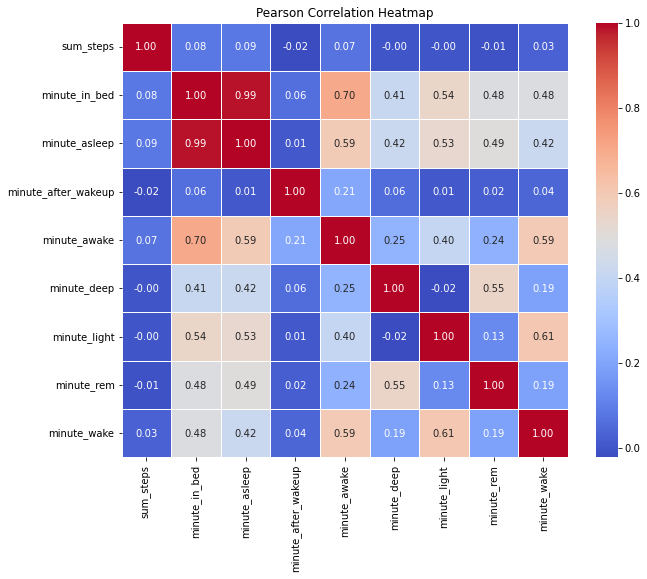

In [3]:
corr = df.drop(columns=["person_id", "answer"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [5]:
# def get_statistics(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     This function returns the mean and standard deviation of the passed DataFrame.
#     """
    
# Define bin edges for 'sum_steps'
bins = [0, 5000, 10000, float('inf')]

# Define bin labels
bin_labels = ['Less than 5000', '5000-10000', 'More than 10000']

# Bin the 'sum_steps' feature
df['sum_steps_bins'] = pd.cut(df['sum_steps'], bins=bins, labels=bin_labels)

# Calculate the mean and standard deviation for each group
grouped_stats = df.groupby('sum_steps_bins').agg({
    'minute_asleep': ['mean', 'std'],
    'minute_rem': ['mean', 'std'],
    'minute_awake': ['mean', 'std'],
    'minute_wake': ['mean', 'std'],
    'minute_light': ['mean', 'std'],
    'minute_deep': ['mean', 'std'],
    'minute_in_bed': ['mean', 'std'],
}).reset_index()

# Display the grouped statistics
print(grouped_stats)

    sum_steps_bins minute_asleep             minute_rem             \
                            mean         std       mean        std   
0   Less than 5000    346.137901  105.737642  79.871321  24.042771   
1       5000-10000    365.606267   89.083884  81.422413  20.920884   
2  More than 10000    368.012363   87.646796  79.091650  20.254315   

  minute_awake            minute_wake            minute_light             \
          mean        std        mean        std         mean        std   
0    42.068083  18.527406   54.673275  12.231809   252.509295  45.994804   
1    45.155123  18.031633   55.562631  10.679054   250.065745  38.727857   
2    45.782691  18.014375   55.558630  10.609991   251.336858  38.931460   

  minute_deep            minute_in_bed              
         mean        std          mean         std  
0   58.525921  17.648497    392.861448  119.579241  
1   60.991307  16.052970    414.897032  100.524269  
2   58.532965  16.058692    417.029482   99.635742  


In [7]:
grouped_stats.round(2)

sum_steps_bins minute_asleep         minute_rem        minute_awake  \
                            mean     std       mean    std         mean   
0   Less than 5000        346.14  105.74      79.87  24.04        42.07   
1       5000-10000        365.61   89.08      81.42  20.92        45.16   
2  More than 10000        368.01   87.65      79.09  20.25        45.78   

         minute_wake        minute_light        minute_deep         \
     std        mean    std         mean    std        mean    std   
0  18.53       54.67  12.23       252.51  45.99       58.53  17.65   
1  18.03       55.56  10.68       250.07  38.73       60.99  16.05   
2  18.01       55.56  10.61       251.34  38.93       58.53  16.06   

  minute_in_bed          
           mean     std  
0        392.86  119.58  
1        414.90  100.52  
2        417.03   99.64